# New York Taxi Fare Prediction Challenge $Best Score: 3.1899$

The New York City Taxi Fare Prediction competition on Kaggle is a machine learning competition that challenges participants to develop predictive models for estimating the fare amount of taxi rides in New York City. The goal of this competition is to create accurate and reliable models that can accurately predict the fare amount based on various input features.

The competition provides participants with a dataset containing information about taxi rides, including features such as pickup and dropoff locations, timestamps, passenger counts, and other relevant details. The dataset is based on real-world taxi ride data from New York City.

The objective of the competition is to use this dataset to build a machine learning model that can accurately predict the fare amount for a given taxi ride. Participants are encouraged to explore the dataset, preprocess the data, and apply various machine learning techniques to develop their models.

The evaluation metric for this competition is the root mean squared error (RMSE) between the predicted fare amount and the actual fare amount. Lower values of RMSE indicate better performance, meaning that the model's predictions are closer to the true fare amounts.

Participants are required to submit their predictions for a test set provided by the competition. The competition leaderboard is based on the RMSE score achieved on the test set, and the top-performing participants are eligible for prizes.

This competition offers a practical and challenging problem in the field of predictive modeling. It requires participants to utilize their skills in data preprocessing, feature engineering, and machine learning algorithms to develop models that can accurately predict taxi fare amounts in a real-world scenario. It provides an opportunity to showcase creativity and analytical thinking while also learning from the diverse approaches and techniques employed by other participants.

# Importing necessary libraries and adjusting aesthetics for plots

In [1]:
#i'm Gonna import just the basic libraies necessary to start the analysis. Then i'll import whatever i need on the go
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120) #to remove the limit of columns shows as output

# Importing Necessary libraies for viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# This is just some asthetics settings for plots before we start EDA
pd.set_option('display.max_columns', None) #Enable to show max columns in code cells
sns.set_style('darkgrid') #set sns plot background
matplotlib.rcParams['font.size'] = 14 #set the deafult plot font size for this notebook
matplotlib.rcParams['figure.figsize'] = (10, 6) #set the deafult plot size for this notebook
matplotlib.rcParams['figure.facecolor'] = '#00000000' #set matplotlib plot background

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Sample Selection for training

In [3]:
sample_size=0.1 #i'm taking a sample size of 10%

import random
random.seed(123)

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

train = pd.read_csv(
         "/kaggle/input/new-york-city-taxi-fare-prediction/train.csv", 
         skiprows=lambda i: i>0 and random.random() > sample_size,dtype=dtypes
)
#This function is simple and effective to apply.
# you can find this code here (https://stackoverflow.com/a/48589768)
print("before dropping NA:{}".format(train.isna().sum()))
train=train.dropna()                                                            # Dropping NA
print("before dropping NA:{}".format(train.isna().sum()))
train.describe() 

before dropping NA:key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    35
dropoff_latitude     35
passenger_count       0
dtype: int64
before dropping NA:key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.539356e+06,5.539356e+06,5.539356e+06,5.539356e+06,5.539356e+06,5.539356e+06
mean,1.133880e+01,-7.251791e+01,3.991663e+01,-7.251720e+01,3.992263e+01,1.686382e+00
std,9.789072e+00,1.282210e+01,9.272609e+00,1.293722e+01,9.337818e+00,1.332785e+00
min,-9.130000e+01,-3.309275e+03,-3.429363e+03,-3.442025e+03,-3.429363e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073495e+01,-7.399139e+01,4.073407e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075267e+01,-7.398016e+01,4.075317e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076714e+01,-7.396368e+01,4.076811e+01,2.000000e+00
max,1.097480e+03,3.456223e+03,3.375234e+03,3.456223e+03,3.390614e+03,2.080000e+02


We are working with a dataset containing information about New York City taxi fares. The goal is to build a machine learning model to predict the fare amount based on various features.

First, we import the necessary libraries, including pandas for data manipulation and random for random number generation. We set a seed value (123) for reproducibility.

Next, we define the variable `sample_size` to represent the percentage of the dataset we want to use for training. Here, we are taking a sample size of 10% (0.1).

The `dtypes` dictionary specifies the desired data types for each column in the dataset. This helps optimize memory usage by reducing the memory footprint of the loaded data.

We then use the `pd.read_csv()` function to read the CSV file containing the dataset. We pass a custom `skiprows` function that randomly selects rows to include in the sample based on the `sample_size` value. This allows us to efficiently load a smaller subset of the data.

After loading the dataset, we print the number of missing values (NA) in each column before dropping them. This gives us an initial understanding of the data quality.

To handle missing values, we use the `train.dropna()` function, which removes rows containing any NA values. This ensures that our model training is based on clean data.

Finally, we use the `train.describe()` function to generate descriptive statistics of the dataset, such as count, mean, standard deviation, and quartiles. This provides insights into the distribution and range of the numerical features.

In [4]:
test=pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/test.csv")
print("before dropping NA:{}".format(train.isna().sum()))
test=test.dropna()                                    # Dropping NA
print("before dropping NA:{}".format(train.isna().sum()))
test.describe()

before dropping NA:key                  0

fare_amount          0

pickup_datetime      0

pickup_longitude     0

pickup_latitude      0

dropoff_longitude    0

dropoff_latitude     0

passenger_count      0

dtype: int64

before dropping NA:key                  0

fare_amount          0

pickup_datetime      0

pickup_longitude     0

pickup_latitude      0

dropoff_longitude    0

dropoff_latitude     0

passenger_count      0

dtype: int64


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Adjusting the dataset according to test dataset

Well, this is not always a good idea to do this but here i found a lot of noise in the train dataset thus, i'm implimenting the filter

In [5]:
# This is the helper function that i created to filter according to test dataset.

def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [6]:
train=remove_outliers(train)

This code snippet showcases a helper function called `remove_outliers()`. The purpose of this function is to filter out outliers from a given DataFrame, specifically based on certain criteria related to the New York City taxi fare dataset.

The function takes a DataFrame `df` as input and applies a series of conditions to filter out rows that are considered outliers. Let's break down the conditions:

1. `df['fare_amount'] >= 1.0` and `df['fare_amount'] <= 500.0`: This condition filters out rows where the fare amount is less than 1 dollar or greater than 500 dollars. It helps remove extremely low or high fare values that may be considered outliers.

2. Longitude and Latitude conditions:
   - `df['pickup_longitude'] >= -75` and `df['pickup_longitude'] <= -72`: These conditions ensure that the pickup longitude values are within the geographical boundaries of New York City.
   - `df['dropoff_longitude'] >= -75` and `df['dropoff_longitude'] <= -72`: Similar to the pickup longitude conditions, these ensure that the dropoff longitude values fall within the acceptable range.
   - `df['pickup_latitude'] >= 40` and `df['pickup_latitude'] <= 42`: These conditions restrict the pickup latitude values to the geographical boundaries of New York City.
   - `df['dropoff_latitude'] >= 40` and `df['dropoff_latitude'] <= 42`: Similarly, these conditions ensure that the dropoff latitude values are within the acceptable range.

3. `df['passenger_count'] >= 1` and `df['passenger_count'] <= 6`: These conditions filter out rows where the passenger count is less than 1 or greater than 6. It eliminates unlikely or erroneous values for the number of passengers.

By applying these conditions, the `remove_outliers()` function returns a filtered DataFrame that contains rows satisfying all the specified criteria. This helps clean the dataset by removing outliers that may adversely affect the performance of the machine learning model.

It's important to note that the specific values used in these conditions are based on domain knowledge and assumptions about the New York City taxi fare dataset. Adjusting these values may be necessary depending on the context and characteristics of the data.

# Feature engineering

This is an important set in ML. I've tried nearly 10 features but found these only work in favour of the model. I'll attach the features i've tried at the end of the notebook for your refference.

# 1. add ride distances

In [8]:
# This function return distance calcuated from 4 points
def haversine_np(lon1, lat1, lon2, lat2):
    
    """Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length."""
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [9]:
train['trip_distance'] = haversine_np(train['pickup_longitude'], train['pickup_latitude'], train['dropoff_longitude'], train['dropoff_latitude'])

In [10]:
# for test dataset
test['trip_distance'] = haversine_np(test['pickup_longitude'], test['pickup_latitude'], test['dropoff_longitude'], test['dropoff_latitude'])

This code snippet presents a helper function called `haversine_np()` that calculates the great circle distance between two points on the Earth, given their decimal degrees of longitude and latitude.

The function takes four input parameters: `lon1`, `lat1`, `lon2`, and `lat2`, representing the longitude and latitude coordinates of two points. The coordinates can be provided as individual values or as arrays of equal length.

The function returns the calculated distance in kilometers.

By using the haversine formula, this function provides an accurate estimation of distances between two points on the Earth's surface. It can be particularly useful in geographic analysis or applications that require distance calculations, such as route planning or location-based services.

# 2. add date parts

In [11]:
# helper function to extract useful info from any datetime column for ML
def extract_from_date(df):
    import datetime
    for col in df.columns:
        if 'date' in col:
            if isinstance(df[col].iloc[0], pd.Timestamp):
                df['year'] = df[col].dt.year
                df['month'] = df[col].dt.month
                df['day'] = df[col].dt.day
                df['day_of_week']=df[col].dt.dayofweek
                df['week_of_year'] = df[col].dt.isocalendar().week
                df['week_of_year'] = df['week_of_year'].astype(int)
                df['hour'] = df[col].dt.hour
            else:
                df[col] = pd.to_datetime(df[col])-datetime.timedelta(hours=4)  #adjusting for the timezone
                df[col] = df[col].dt.tz_localize(None)
                df['year'] = df[col].dt.year
                df['month'] = df[col].dt.month
                df['day'] = df[col].dt.day
                df['day_of_week']=df[col].dt.dayofweek
                df['week_of_year'] = df[col].dt.isocalendar().week
                df['week_of_year'] = df['week_of_year'].astype(int)
                df['hour'] = df[col].dt.hour;

In [12]:
extract_from_date(train)

In [13]:
# for test dataset
extract_from_date(test)

In this code snippet, we have a helper function called `extract_from_date()`. The purpose of this function is to extract useful information from a datetime column in a given DataFrame for machine learning purposes.

The function takes a DataFrame `df` as input. It iterates over each column name in the DataFrame and checks if the column name contains the word 'date'. This check allows the function to identify columns that contain datetime information.

If the column contains datetime information and the first value of the column is of type `pd.Timestamp`, the function performs the following operations:

- `df['year'] = df[col].dt.year`: This line extracts the year component from the datetime column and creates a new column named 'year' in the DataFrame.

- `df['month'] = df[col].dt.month`: Similarly, this line extracts the month component and creates a new column named 'month' in the DataFrame.

- `df['day'] = df[col].dt.day`: This line extracts the day component and creates a new column named 'day' in the DataFrame.

- `df['day_of_week'] = df[col].dt.dayofweek`: This line extracts the day of the week (0 for Monday, 1 for Tuesday, and so on) and creates a new column named 'day_of_week' in the DataFrame.

- `df['week_of_year'] = df[col].dt.isocalendar().week`: This line extracts the week of the year using the `isocalendar().week` method and creates a new column named 'week_of_year' in the DataFrame. The week numbers are represented as integers.

- `df['hour'] = df[col].dt.hour`: This line extracts the hour component and creates a new column named 'hour' in the DataFrame.

If the column contains datetime information but the first value is not of type `pd.Timestamp`, it means the column needs to be converted to a datetime format. The function performs the following operations:

- `df[col] = pd.to_datetime(df[col]) - datetime.timedelta(hours=4)`: This line converts the column to a datetime format using `pd.to_datetime()`. It then subtracts 4 hours from each value to adjust for the timezone difference. This line assumes the original datetime values were in a different timezone and converts them to a common timezone.

- `df[col] = df[col].dt.tz_localize(None)`: After adjusting the timezone, this line removes the timezone information from the datetime values, leaving only the date and time components.

The function then proceeds to extract the same useful information as mentioned earlier (year, month, day, day_of_week, week_of_year, hour) and creates new columns in the DataFrame for each of these components.

By applying this function, we can extract important temporal features from datetime columns in a dataset. These features can be valuable inputs for machine learning models, enabling them to capture time-based patterns and dependencies in the data.

# 3. Popular Landmarks

In [14]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude']);
    
    
for a_df in [train, test]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In this code snippet, we have a function called `add_landmark_dropoff_distance()` and a loop that applies this function to both the `train` and `test` datasets. The purpose of this code is to calculate the dropoff distance from specific landmarks and add this information as new columns in the datasets.

The function `add_landmark_dropoff_distance()` takes three parameters: `df`, which represents the DataFrame to which the new column will be added, `landmark_name`, which is a string specifying the name of the landmark, and `landmark_lonlat`, which is a tuple containing the longitude and latitude coordinates of the landmark.

Within the function, the longitude (`lon`) and latitude (`lat`) values are extracted from the `landmark_lonlat` tuple. Then, the `haversine_np()` function is called to calculate the distance between the landmark coordinates and the dropoff longitude and latitude values in the DataFrame `df`. The calculated distance is stored in a new column, named with the `landmark_name` and the suffix '_drop_distance'.

In the loop that follows, the `add_landmark_dropoff_distance()` function is applied to each dataset (`train` and `test`) for a list of predefined landmarks. For each landmark, a new column is added to the dataset, containing the dropoff distance from that landmark.

The predefined landmarks and their corresponding longitude and latitude coordinates are as follows:

- JFK Airport: Longitude -73.7781, Latitude 40.6413
- LGA Airport: Longitude -73.8740, Latitude 40.7769
- EWR Airport: Longitude -74.1745, Latitude 40.6895
- Metropolitan Museum of Art: Longitude -73.9632, Latitude 40.7794
- World Trade Center: Longitude -74.0099, Latitude 40.7126

By executing this code, the `train` and `test` datasets will be expanded with additional columns representing the distance between each dropoff location and the predefined landmarks. This information can be useful for machine learning models to capture the proximity of dropoff locations to significant landmarks, enabling them to potentially learn location-specific patterns.

# Exploratory Data Analysis

### 1. Histogram of Fare Amount:
This plot provides an overview of the distribution of fare amounts.

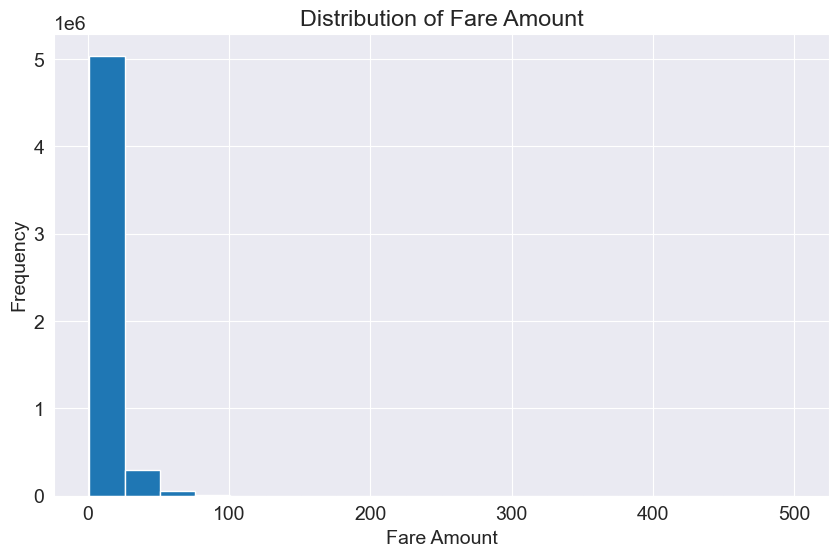

In [21]:
plt.hist(train['fare_amount'], bins=20)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

### Scatter Plot of Pickup and Dropoff Locations:
This plot allows you to visualize the spatial distribution of the pickup and dropoff locations on a scatter plot.

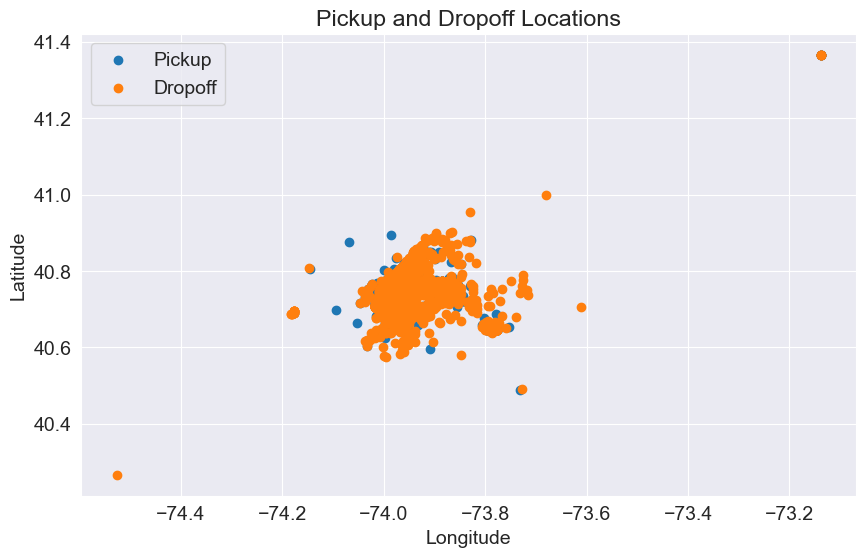

In [25]:
sampled_data = train.sample(n=10000)  # Adjust the sample size as needed
plt.scatter(sampled_data['pickup_longitude'], sampled_data['pickup_latitude'], label='Pickup')
plt.scatter(sampled_data['dropoff_longitude'], sampled_data['dropoff_latitude'], label='Dropoff')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations')
plt.legend()
plt.show()

### Bar Plot of Passenger Counts:
This plot provides insights into the distribution of passenger counts in the dataset.

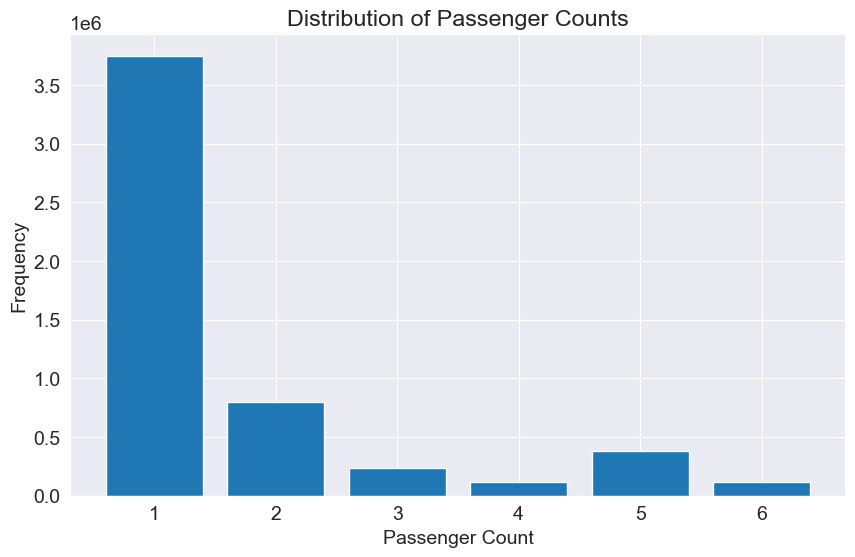

In [26]:
passenger_counts = train['passenger_count'].value_counts()
plt.bar(passenger_counts.index, passenger_counts.values)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts')
plt.show()

### Line Plot of Fare Amount over Time:
This plot shows the trend of fare amounts over time, allowing you to identify any patterns or seasonality.

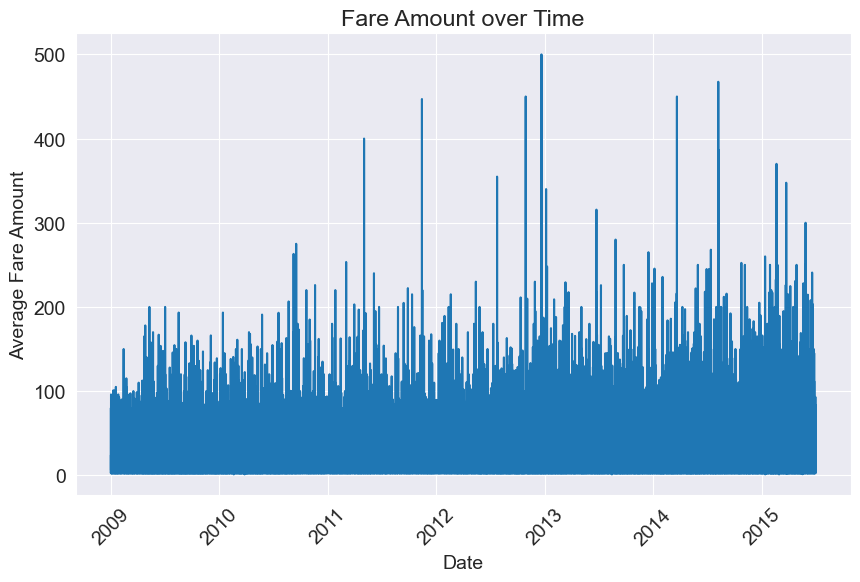

In [27]:
# df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# df['date'] = df['pickup_datetime'].dt.date
fare_over_time = train.groupby('pickup_datetime')['fare_amount'].mean()

plt.plot(fare_over_time.index, fare_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.title('Fare Amount over Time')
plt.xticks(rotation=45)
plt.show()

### Box Plot of Fare Amount by Day of Week:
This plot helps analyze the variation in fare amounts based on the day of the week.

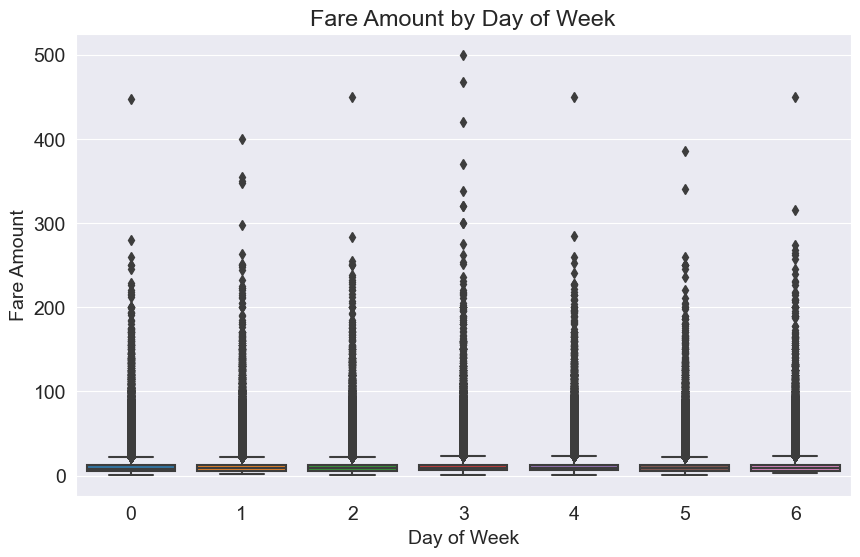

In [29]:
# df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
sns.boxplot(x=train['day_of_week'], y=train['fare_amount'])
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')
plt.title('Fare Amount by Day of Week')
plt.show()

# Converting to parquets

This makes the size of the dataset smaller also helps in faster ML modelling

In [30]:
train.to_parquet('train.parquet')
test.to_parquet('test.parquet')

# splitting into train and test

In [31]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'hour', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance'],
      dtype='object')

In [32]:
input_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'hour', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance']
target_col = 'fare_amount'

In [33]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)

In [34]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
test_inputs = test[input_cols]

In [35]:
def rmse(model):
    model.fit(train_inputs, train_targets)
    train_preds=model.predict(train_inputs)
    val_preds=model.predict(val_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse,val_rmse

The `rmse` function calculates the Root Mean Squared Error (RMSE) for a given model. Here's a brief explanation of the code:

1. The `model.fit(train_inputs, train_targets)` line fits the model to the training data, where `train_inputs` are the input features and `train_targets` are the corresponding target values.

2. The `train_preds = model.predict(train_inputs)` line uses the trained model to make predictions on the training data.

3. The `val_preds = model.predict(val_inputs)` line uses the trained model to make predictions on the validation data.

4. The `train_rmse = mean_squared_error(train_targets, train_preds, squared=False)` line calculates the RMSE between the actual target values (`train_targets`) and the predicted target values on the training data (`train_preds`).

5. The `val_rmse = mean_squared_error(val_targets, val_preds, squared=False)` line calculates the RMSE between the actual target values on the validation data (`val_targets`) and the predicted target values on the validation data (`val_preds`).

6. Finally, the function returns the calculated RMSE values for both the training and validation sets using `return train_rmse, val_rmse`.

Note that the code assumes the presence of the necessary libraries and data (`train_inputs`, `train_targets`, `val_inputs`, `val_targets`) for training and validation.

# training models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()

rmse(linear_regression)

(5.104621726502164, 5.129603743574691)

In [37]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(random_state=42)


rmse(ridge_regression)

(5.104621780651683, 5.129606187145003)

In [38]:
from xgboost import XGBRegressor
gradient_boosting = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror',tree_method = 'gpu_hist')

rmse(gradient_boosting)

(3.5256763, 3.6629467)

I tried again a bunch od models with _Hyperparameter Tuning_ and girdseachcv but this simple baseline model was better than the fined tunes ones also that uses a lot of computational power to achive very slight accuracy. Thus i'm stopping with this model itsef.

Always in ML a balance between computational power and accuracy is important rather than training days of ML model to get slight increase in accuracy

# Submitting model

In [41]:
from IPython.display import display, FileLink

def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return display(FileLink(fname))

In [ ]:
predict_and_submit(gradient_boosting,'submission.csv')

# Things i tried

## setting train according to test

In [ ]:
"""# This is the helper function that i created to filter according to test dataset.
# This is not that complex and its self explanatory.

def filter_for_test(train, test):
    train = train[(train['fare_amount'] >= 0)]  #need to check if the fares can be zero
    for i in test.columns:
        if i not in ["fare_amount", "pickup_datetime", "key"]:
            test_col_range = (test[i].min(), test[i].max())
            train = train[(train[i] >= test_col_range[0]) & (train[i] <= test_col_range[1])]
    train.reset_index(drop=True, inplace=True)  # Reset index after filtering
    return train
    
    
train=filter_for_test(train,test)"""

## add near landmark check

In [ ]:
"""import numpy as np

landmarks = {
    "Statue of Liberty": (-74.0445, 40.6892),
    "Empire State Building": (-73.9857, 40.7484),
    "Times Square": (-73.9851, 40.7589),
    "Central Park": (-73.9654, 40.7829),
    "Brooklyn Bridge": (-73.9968, 40.7061),
    "One World Trade Center": (-74.0134, 40.7130),
    "Grand Central Terminal": (-73.9772, 40.7527),
    "Metropolitan Museum of Art": (-73.9632, 40.7794),
    "Rockefeller Center": (-73.9787, 40.7587),
    "High Line": (-74.0048, 40.7479),
    "9/11 Memorial": (-74.013327, 40.711524),
    "Union Square": (-73.9903, 40.7359),
    "Chinatown": (-73.9965, 40.7158),
    "Veselka": (-73.9827, 40.729),
    "SoHo": (-74.0024, 40.7247),
    "Greenwich Village": (-74.0018, 40.7336),
    "Harlem": (-73.9442, 40.8079),
    "Subway": (-73.9871, 40.7409),
    "LaGuardia Airport": (-73.874, 40.7769),
    "JFK Airport": (-73.7781, 40.6413),
    "Newark Liberty International Airport": (-74.1724, 40.6895),
    "Brooklyn Battery Tunnel": (-74.0048, 40.7046),
    "Downtown Brooklyn": (-73.984, 40.6932),
    "Manhattan Bridge": (-73.9897, 40.7071),
    "Williamsburg Bridge": (-73.9654, 40.7126),
    "Lower Manhattan": (-74.0121, 40.7074),
    "14th Street": (-74.0003, 40.7409),
    "23rd Street": (-73.9911, 40.7441),
    "34th Street": (-74.0018, 40.7527),
    "42nd St": (-73.9878, 40.7559),
    "57th St": (-73.9776, 40.7644),
    "Queens Midtown Tunnel": (-73.9666, 40.7448),
    "Long Island City": (-73.9396, 40.7536),
    "Queensboro Bridge": (-73.953, 40.7572)
}

def is_near_landmark(coord, landmarks, distance_threshold):
    for landmark, landmark_coord in landmarks.items():
        dist = haversine_np(coord[0], coord[1], landmark_coord[0], landmark_coord[1])
        if dist <= distance_threshold:
            return 1
    return 0

distance_threshold = 2  # Distance threshold in kilometers"""

## add airport distances

In [ ]:
"""def calculate_distances(df):
    jfk_coord = (40.639722, -73.778889)
    ewr_coord = (40.6925, -74.168611)
    lga_coord = (40.77725, -73.872611)
    sol_coord = (40.6892, -74.0445)  # Statue of Liberty
    nyc_coord = (40.7141667, -74.0063889)
    
    df['jfk_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], jfk_coord[1], jfk_coord[0]) + haversine_np(df['dropoff_longitude'], df['dropoff_latitude'], jfk_coord[1], jfk_coord[0])
    df['ewr_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], ewr_coord[1], ewr_coord[0]) + haversine_np(df['dropoff_longitude'], df['dropoff_latitude'], ewr_coord[1], ewr_coord[0])
    df['lga_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], lga_coord[1], lga_coord[0]) + haversine_np(df['dropoff_longitude'], df['dropoff_latitude'], lga_coord[1], lga_coord[0])
    df['sol_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], sol_coord[1], sol_coord[0]) + haversine_np(df['dropoff_longitude'], df['dropoff_latitude'], sol_coord[1], sol_coord[0])
    df['nyc_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], nyc_coord[1], nyc_coord[0]) + haversine_np(df['dropoff_longitude'], df['dropoff_latitude'], nyc_coord[1], nyc_coord[0])"""

## add distance clusters

In [ ]:
"""from sklearn.cluster import KMeans

# Select the 'trip_distance' and 'fare_amount' columns
train_data = train[['trip_distance']]


# Perform K-means clustering
cluster_range = range(1, 10)  # Range of cluster sizes to try
inertia_values = []  # To store the sum of squared distances within clusters (inertia) for each cluster size

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(train_data)
    inertia_values.append(kmeans.inertia_) 

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

# Perform K-means clustering with the optimal cluster size
optimal_cluster_size = 5  # Replace with the cluster size determined from the elbow method
kmeans = KMeans(n_clusters=optimal_cluster_size, random_state=42,n_init='auto')
kmeans.fit(train_data)
labels = kmeans.labels_
train['distance_clusters']=labels

# Plot the clusters on a scatter plot
plt.scatter(train_data['trip_distance'], np.zeros_like(train_data['trip_distance']), c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], np.zeros_like(kmeans.cluster_centers_[:, 0]), marker='x', color='red', label='Cluster Centers')
plt.xlabel('Trip Distance')
plt.title('K-means Clustering')
plt.legend()
plt.show()"""

## add bearing direction

In [ ]:
"""import math

def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates the initial bearing between two sets of coordinates.

    Arguments:
    lat1 -- latitude of the first coordinate (in decimal degrees)
    lon1 -- longitude of the first coordinate (in decimal degrees)
    lat2 -- latitude of the second coordinate (in decimal degrees)
    lon2 -- longitude of the second coordinate (in decimal degrees)

    Returns:
    bearing -- initial bearing in degrees
    """

    # Convert decimal degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Calculate differences in longitudes and latitudes
    dLon = lon2 - lon1

    # Calculate bearing
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
    bearing = math.degrees(math.atan2(y, x))

    # Convert bearing to a 0-360 degree range
    #bearing = (bearing + 360) % 360

    return bearing


# Define a function to combine bearing and distance
def combine_bearing_distance(distance, bearing):
    # Define a factor for combining bearing and distance
    bearing_factor = 0.5  # Adjust this factor based on the importance you want to give to the bearing

    # Multiply the distance by the bearing factor
    combined_value = distance * bearing_factor

    return combined_value
    

train['bearing'] = train.apply(lambda row: calculate_bearing(row['pickup_latitude'], row['pickup_longitude'],
                                                      row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Create a new feature by combining bearing and distance
train['bearing'] = train.apply(lambda row: combine_bearing_distance(row['trip_distance'], row['bearing']), axis=1)"""

## Coordinate Clusters

In [ ]:
"""from sklearn.cluster import KMeans
coordinates = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

# K-MEANS:

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 30)  # Try different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Create a K-means clustering model
kmeans = KMeans(n_clusters=2, random_state=42,n_init='auto')  #need to change no. of clustersaccoding to the train dataset

# Fit the model to the coordinates
kmeans.fit(coordinates)

# Get the cluster labels
cluster_labels = kmeans.labels_

train['cluster_label'] = cluster_labels"""

##  Add Neighbourhood

In [ ]:
"""neighborhoods = {
    'Bronx': {
        'latitude': (40.7855, 40.9176),
        'longitude': (-73.9338, -73.7654)
    },
    'Manhattan': {
        'latitude': (40.6987, 40.8780),
        'longitude': (-74.0197, -73.9036)
    },
    'Queens': {
        'latitude': (40.4957, 40.8007),
        'longitude': (-73.9635, -73.7004)
    },
    'Brooklyn': {
        'latitude': (40.5510, 40.7394),
        'longitude': (-74.0563, -73.8331)
    },
    'Staten Island': {
        'latitude': (40.4774, 40.6514),
        'longitude': (-74.2591, -74.0536)
    }
}


# Function to determine the neighborhood based on coordinates
def get_neighborhood(latitude, longitude):
    for neighborhood, coords in neighborhoods.items():
        lat_min, lat_max = coords['latitude']
        lon_min, lon_max = coords['longitude']
        if lat_min <= latitude <= lat_max and lon_min <= longitude <= lon_max:
            return neighborhood
    return 'Unknown'


train['pickup_neighbourhood'] = train.apply(lambda row: get_neighborhood(row['pickup_latitude'], row['pickup_longitude']), axis=1)
train['dropoff_neighbourhood'] = train.apply(lambda row: get_neighborhood(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)"""

## add Direction feature

In [ ]:
"""def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

train["delta_lon"] = train["pickup_longitude"] - train["dropoff_longitude"]
train["delta_lat"] = train["pickup_latitude"] - train["dropoff_latitude"]
train['direction'] = calculate_direction(train.delta_lon, train.delta_lat)"""

## Fair type

sources:

[boolmberg](https://www.bloomberg.com/news/articles/2022-11-15/nyc-taxi-cab-fares-to-rise-23-in-first-increase-since-2012)

[NYC GOV](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)

In [ ]:
"""def fare_type(df):
    df['fare_type'] = np.where(df['year'] < 2012, 0, 1);
    
fare_type(train)"""

## overnight and rush hour surcharges.

sources:

[boolmberg](https://www.bloomberg.com/news/articles/2022-11-15/nyc-taxi-cab-fares-to-rise-23-in-first-increase-since-2012)

[NYC GOV](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)

In [ ]:
"""overnight=[20,21,22,23,0,1,2,3,4,5,6]
rush_hour=[16,17,18,19]

def surcharge(df):
    df['overnight'] = df['hour'].apply(lambda x: 1 if x in overnight else 0)
    df['rush_hour'] = df['hour'].apply(lambda x: 1 if x in rush_hour else 0);
    
    
surcharge(train)"""

## improvement surcharge

sources:

[boolmberg](https://www.bloomberg.com/news/articles/2022-11-15/nyc-taxi-cab-fares-to-rise-23-in-first-increase-since-2012)

[NYC GOV](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)

In [ ]:
"""def improvement(df):
    df['improvement_surcharge'] = np.where(df['year'] >= 2015, 1, 0);
    
improvement(train)"""

### Airport Charges

In [ ]:
"""def airport_charges(df):
    airport_coordinates = {
        'LaGuardia Airport': (-73.874, 40.7769),
        'JFK Airport': (-73.7781, 40.6413),
        'Newark Liberty International Airport': (-74.1724, 40.6895)
    }
    
    def within_1km(row):
        for airport, coordinates in airport_coordinates.items():
            pickup_distance = haversine_np(row['pickup_longitude'], row['pickup_latitude'], coordinates[0], coordinates[1])
            dropoff_distance = haversine_np(row['dropoff_longitude'], row['dropoff_latitude'], coordinates[0], coordinates[1])
            if pickup_distance <= 1 or dropoff_distance <= 1:
                return 1
        return 0
    
    df['airport_charges'] = df.apply(within_1km, axis=1);
    
    
airport_charges(train)"""

Even though some of the things i took it from the official NYC.gov website that didn't seemed to work for this dataset. If u think any of this might help the model feel free to use my code

# The End